In [1]:
## Importing the libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

![](1.png)

![](2.png)

In [2]:
## loading the dataset
data = pd.read_csv('avocado.csv')

In [3]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## The head() method help to display the first 4 records of our dataset.

In [4]:
## let's drop the Unnamed: 0 column ,because it is like second indexes of our dataset.

data.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
pd.options.display.max_columns = None

## From the header of our dataset we can see that the AveragePrice column  which is 
## our target variable have continuous values, so we can assume that our problem is a Regression problem.



In [7]:
data.shape

(18249, 13)

### The data.shape show us that our dataset has 18249 records and 13 columns. 

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


### data.info() gives some more important information about our dataset and we can see that there no missing values
### we can see also that our dataset have kind of data type __(dtypes)__ :"object",'float64' and "int64 "

In [9]:
data.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

### From about verification we can see that our dataset has no NaN in the columns.

In [10]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


### From the describe() method we can see ,how the data is distributed in each column.
### we can see also the count, the mean,the standar deviation of each  NUmeric column and also the
### the minimum and the maximum and the quantitles of each column.


## ************************************************

In [11]:
### let's check the columns which has dtype, there are those have text data

for column in data.columns:
    if data[column].dtype =='object':
        print(column)

Date
type
region


## Now we got the columns those which have text data.

In [12]:
data.Date.value_counts()

2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64

In [13]:
data.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

#### We can see that the type attribute has only two classes ,so let's use __LabelEncoder to Encoder__ it.

In [14]:
## importing the libraries 
from sklearn.preprocessing import LabelEncoder
# Instantiate the method.
lab_enc = LabelEncoder()

In [15]:
df = lab_enc.fit_transform(data['type'])

In [16]:
df

array([0, 0, 0, ..., 1, 1, 1])

In [17]:
## let's update the column type with the new data

data['type'] = df

In [18]:
## verification
data.type.value_counts()


0    9126
1    9123
Name: type, dtype: int64

In [19]:
data.region.value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

### We can see that our region attribute has mulptiple classes,
### So will use also Lable Encoder to encoder it.

In [20]:
df1 = lab_enc.fit_transform(data['region'])

In [21]:
## let's update the column type with the new data

data['region'] = df1

In [22]:
## verification
data.region.value_counts()

0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
51    338
52    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
53    335
Name: region, dtype: int64

#### Using value_counts() we can see our is the count inside each attribute and defferent classes.

In [23]:
data.Date

0        2015-12-27
1        2015-12-20
2        2015-12-13
3        2015-12-06
4        2015-11-29
            ...    
18244    2018-02-04
18245    2018-01-28
18246    2018-01-21
18247    2018-01-14
18248    2018-01-07
Name: Date, Length: 18249, dtype: object

## Since we have Date in our dataset columns I don't think the Year attribute will helpfull since the Date has
## Year,month,and day. so let's drop it Year column.


In [24]:
data.drop('year',axis=1,inplace=True)

### Now let's seperate the Date column into "year" , "Month" and ,"day"

In [25]:
#data.Date.dt().year()

In [26]:
# import time the libraries
import datetime


In [27]:
year = []
month = []
day = []

In [28]:
date = ['2021-05-21 11:22:03','2021-05-21 11:22:03']

In [29]:
for i in range(len(data['Date'])):
    datem = datetime.datetime.strptime(data['Date'][i], "%Y-%m-%d")
    year.append(datem.year)
    month.append(datem.month)
    day.append(datem.day)

In [30]:
len(day)

18249

In [31]:
data1 = pd.DataFrame({
    'year': year,
    'month':month,
    'day':day
})

In [32]:
data1

,year,month,day
0,2015,12,27
1,2015,12,20
2,2015,12,13
3,2015,12,6
4,2015,11,29
...,...,...,...
18244,2018,2,4
18245,2018,1,28
18246,2018,1,21
18247,2018,1,14


### Now have converted our Date attribute into year ,month and day , let's drop it.

In [33]:
data.drop('Date',axis=1,inplace=True)

In [34]:
## let's concatinate the data and data1 created using Date details

Num_data = pd.concat([data,data1],axis=1)


In [35]:
Num_data.shape

(18249, 14)

In [36]:
Num_data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,year,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,2015,11,29


### Since the avocado is sold by unit and we want to predict average price of a single avocado ,
### so i think the columns like "Total Volume", "XLarge Bags","Large Bags","Small Bags","Total Bags" ,
### "4046","4225","4770" cannot help to predict a single avocado AveragePrice which is our target so let's remove them.

In [40]:
Num_data.drop(["Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags"],axis=1,inplace=True)

In [41]:
Num_data.shape

(18249, 6)

## Now our New  dataset has 6 columns and 18249 attribute and it contain only numerical data.

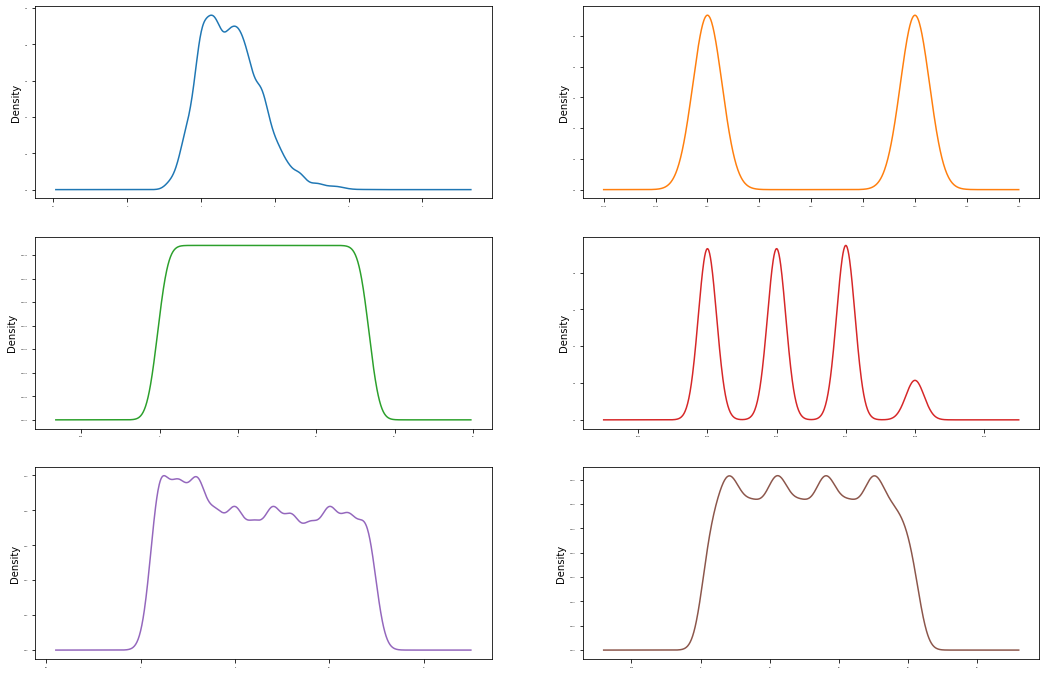

In [42]:
Num_data.plot(kind='density',subplots=True,
          layout=(3,2),sharex=False,
          legend=False,fontsize='2',
          figsize =(18,12))
plt.show()

### From this density graph we can see that most the columns in the dataset have does not have normal distribution format.

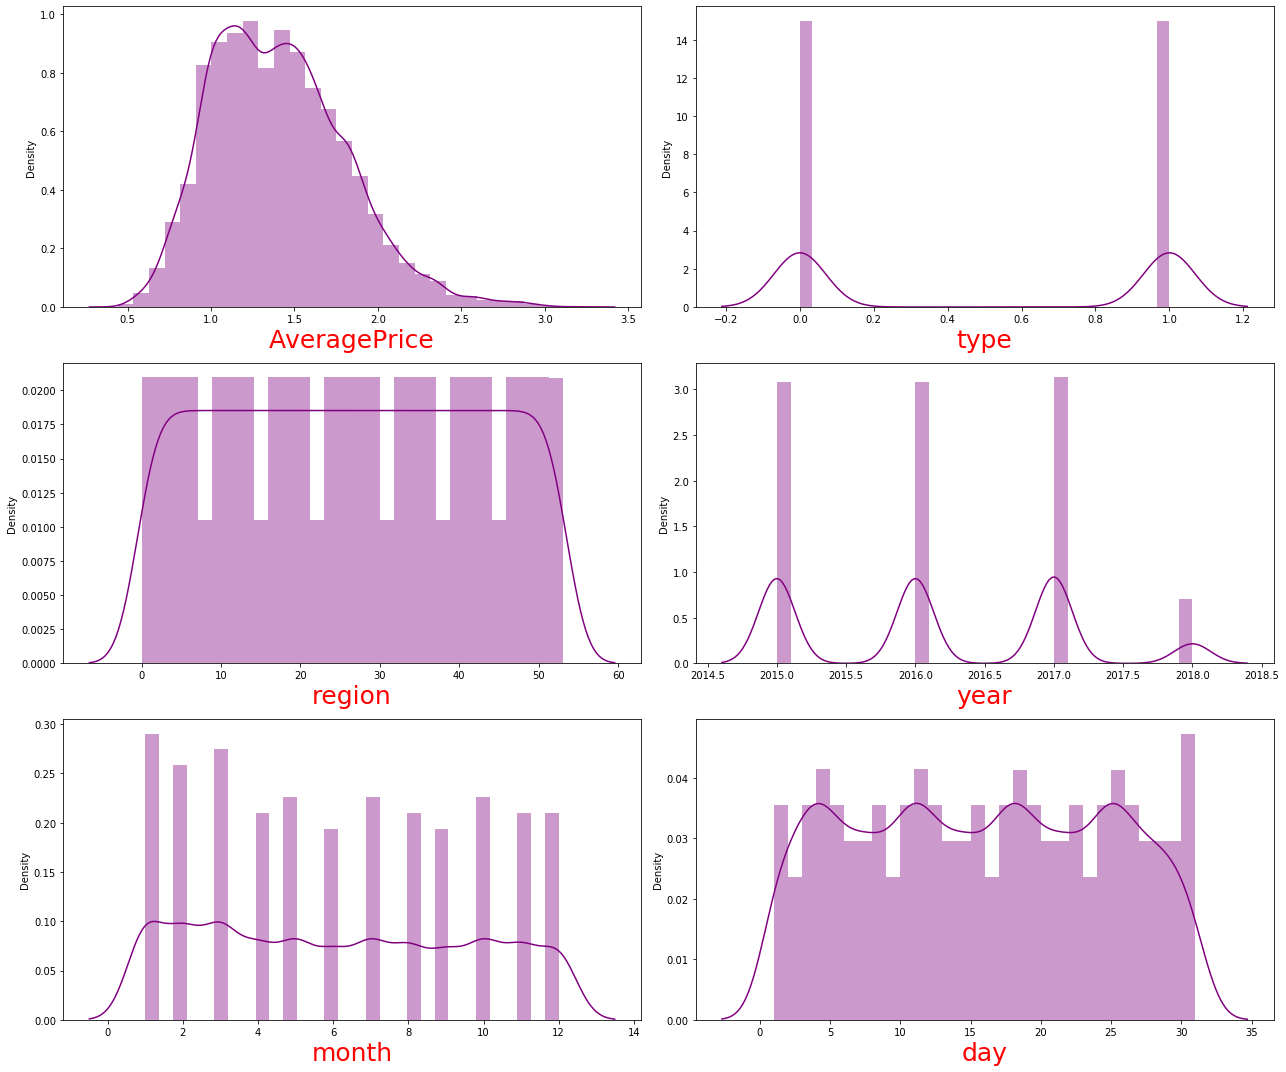

In [43]:
## plot a  distplot check the distribution

plt.figure(figsize=(18,15))
plotnumber = 1

for column in Num_data:
    if plotnumber <= 6:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(Num_data[column],bins=30,color='purple')
        plt.xlabel(column,fontsize = 25,color='red')
    plotnumber+=1
plt.tight_layout()

### From distplot we can see that our data is not distributed normally for all the columns since we can see large skewness in some of the columns of our dataset.

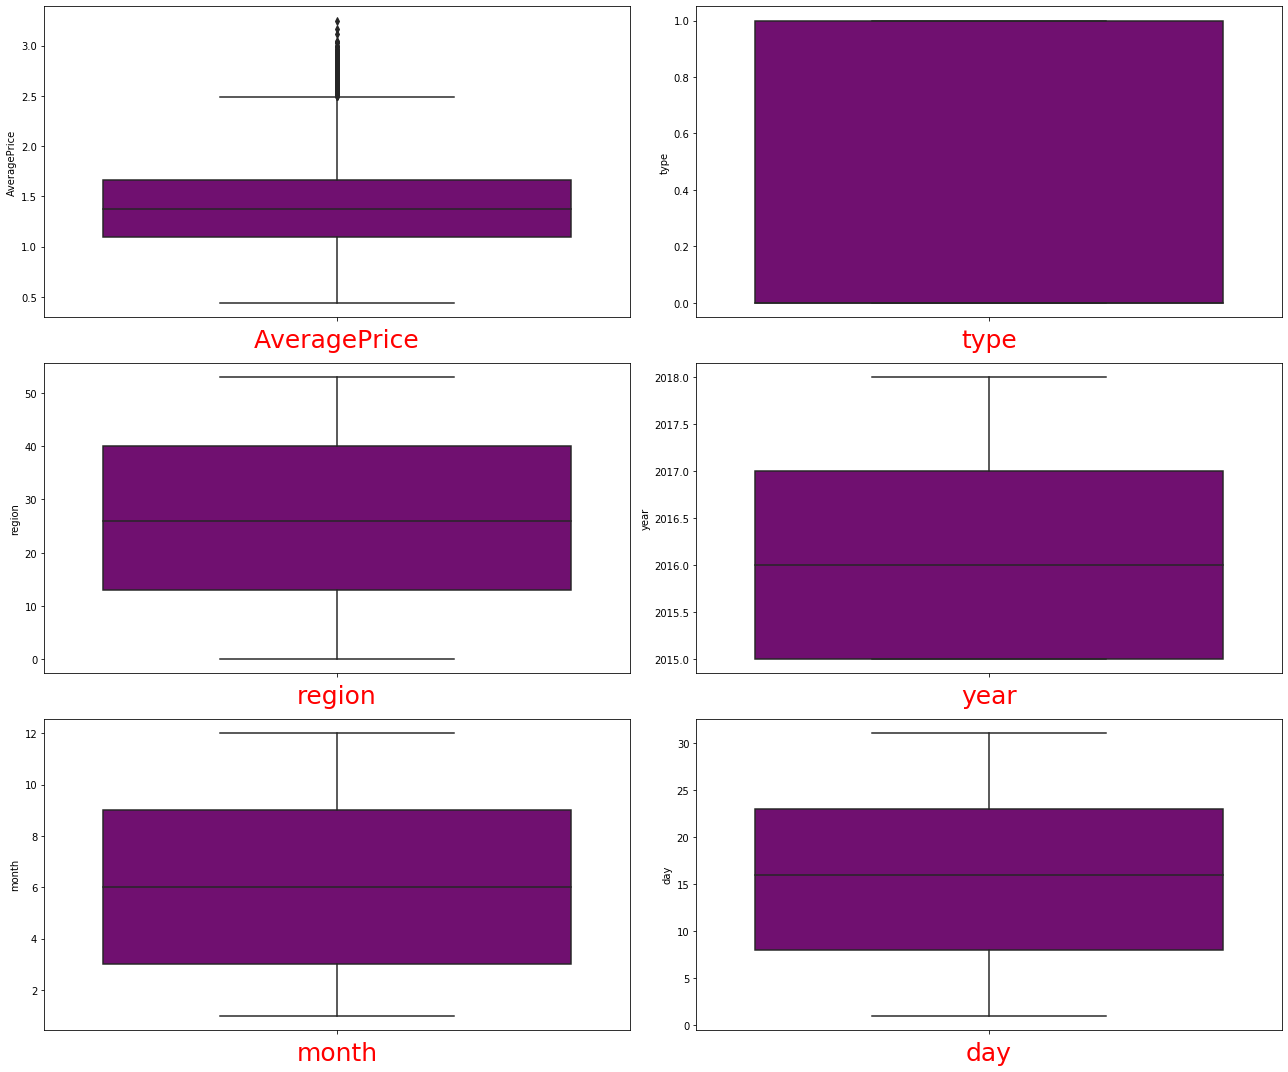

In [44]:
plt.figure(figsize=(18,15))
plotnumber = 1

for column in Num_data:
    if plotnumber <= 6:
        ax = plt.subplot(3,2,plotnumber)
        sns.boxplot(y= Num_data[column],color='purple',orient='h')
        plt.xlabel(column,fontsize = 25,color='red')
    plotnumber+=1
plt.tight_layout()

### From the above boxplot graph we can see outliers in target column AveragePrice 

## Removing Outliers using zscore Method.

In [45]:
## Importing the libraries
from scipy.stats import zscore

In [46]:
z = np.abs(zscore(Num_data))


In [47]:
new_data = Num_data[(z<3).all(axis =1)]


In [48]:
## let's check the shape our the new data
new_data.shape

(18118, 6)

### The new_data have  18118 rows and 6 columns...


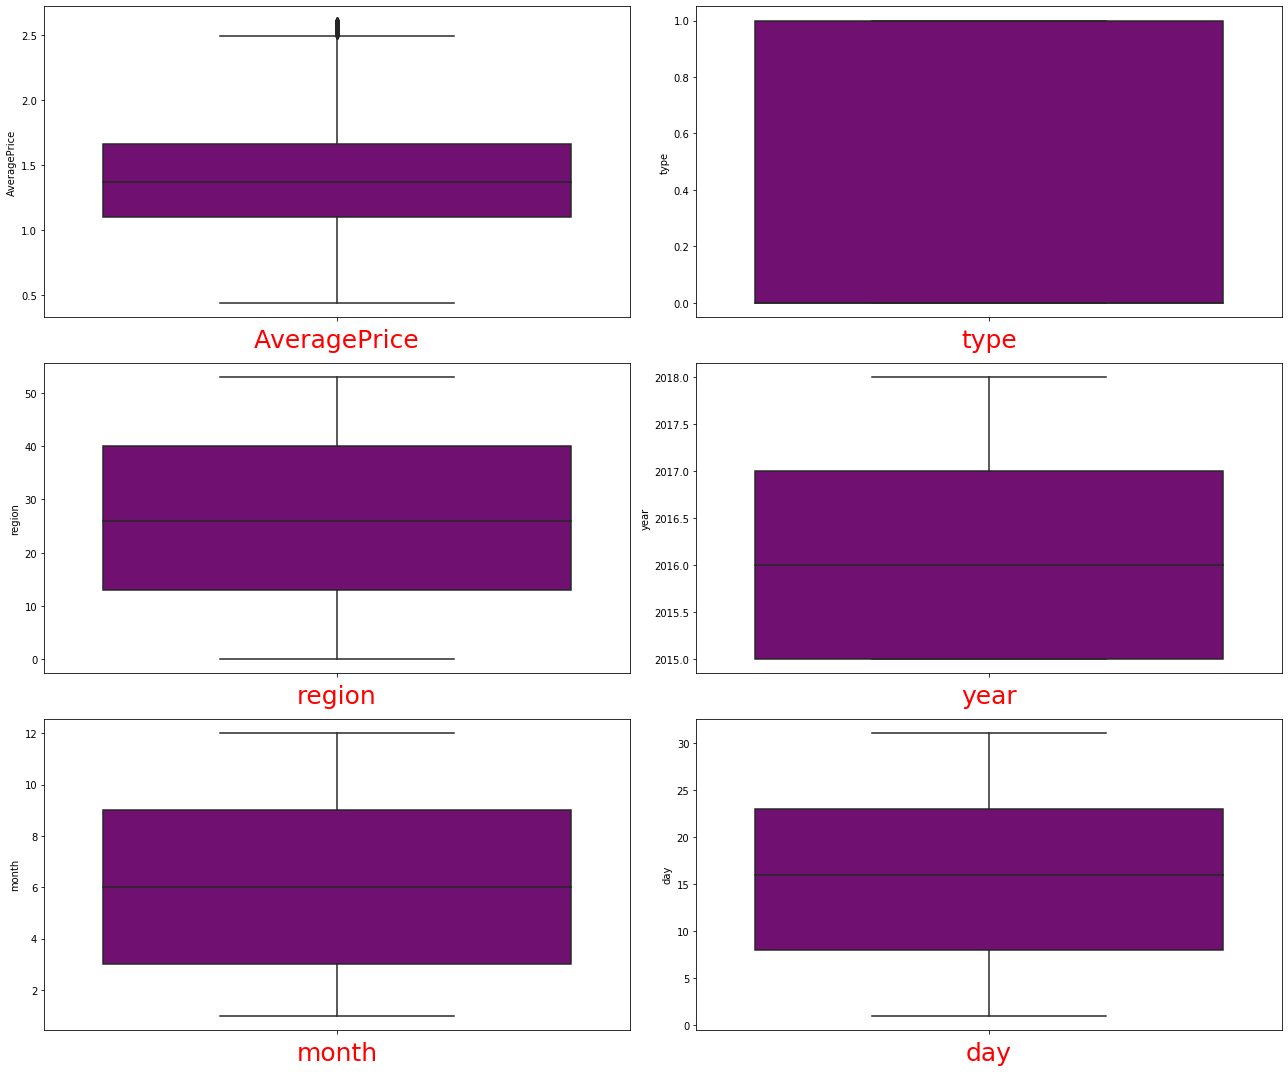

In [49]:
### Again let's check if the outliers are removed or not
plt.figure(figsize=(18,15))
plotnumber = 1

for column in new_data:
    if plotnumber <= 6:
        ax = plt.subplot(3,2,plotnumber)
        sns.boxplot(y= new_data[column],color='purple',orient='h')
        plt.xlabel(column,fontsize = 25,color='red')
    plotnumber+=1
plt.tight_layout()

### we can see that there are till outliers in the target  column.Let's use the Quantiles techniques and see if we can remove them.

#### Outlier Dectection Formula
#### Higher side ===> Q3 + (1.5 * IQR)
#### lower side ===> Q1 - (1.5 * IQR)
#### IQR = Inter Quantile Rate = Q3 - Q1

In [50]:
## Find the IQR ( Inter Quantile Range) to identify outlier

# 1st quantile
q1 = new_data.quantile(0.25)

# 3rd quantile
q3 = new_data.quantile(0.75)

#IQR 
iqr = q3 - q1

In [51]:
high_AveragePrice = (q3.AveragePrice + (1.5 * iqr.AveragePrice))
high_AveragePrice

2.4999999999999996

### This means from the column AveragePrice all the records values greater than 2.499 (AveragePrice > 2.499) are Outliers.

In [52]:
## the get indexes of those records

indexes = np.where(new_data['AveragePrice'] > high_AveragePrice)
indexes

(array([11314, 11320, 12242, 12807, 12810, 13792, 13995, 13996, 13997,
        14049, 14092, 14093, 14357, 14660, 14766, 14767, 14768, 14769,
        14770, 14771, 14981, 14982, 14983, 14984, 14986, 15027, 15074,
        15087, 15091, 15092, 15609, 15611, 15612, 15613, 15617, 15621,
        15749, 15751, 15752, 15806, 15987, 16589, 16634, 16637, 16647,
        16649, 16801, 16806, 16815, 16843, 16896, 16902, 16903, 16904,
        16905, 16906, 16907, 16908, 16909, 16910, 16911, 16914, 16915,
        16927, 16928, 16929, 16930, 17125, 17128, 17129, 17132, 17134,
        17135, 17302, 17303, 17383, 17384, 17437]),)

In [54]:
## verification of the first index

new_data['AveragePrice'].iloc[11314]

2.58

### Yes we can see that 2.58 > 2.499

In [55]:
## Let's drop index from the dataset

new_data = new_data.drop(new_data.index[indexes])

In [56]:
## Let's reset the indexes
new_data.reset_index(drop=True)

,AveragePrice,type,region,year,month,day
0,1.33,0,0,2015,12,27
1,1.35,0,0,2015,12,20
2,0.93,0,0,2015,12,13
3,1.08,0,0,2015,12,6
4,1.28,0,0,2015,11,29
...,...,...,...,...,...,...
18035,1.63,1,53,2018,2,4
18036,1.71,1,53,2018,1,28
18037,1.87,1,53,2018,1,21
18038,1.93,1,53,2018,1,14


### Again let's check our new dataset if the outliers are removed..

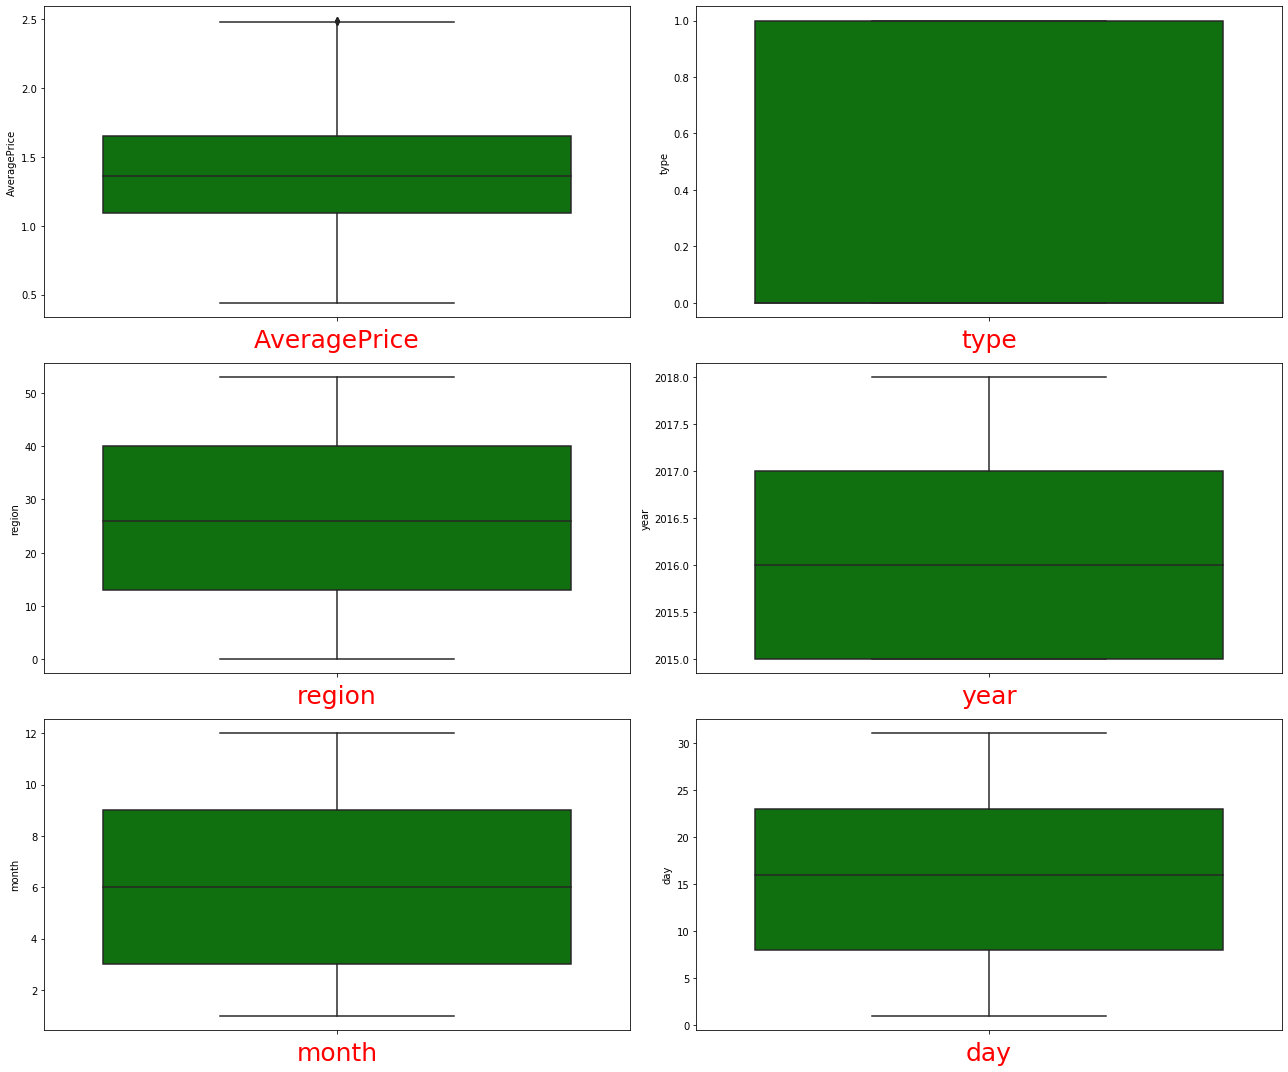

In [57]:
plt.figure(figsize=(18,15))
plotnumber = 1

for column in new_data:
    if plotnumber <= 6:
        ax = plt.subplot(3,2,plotnumber)
        sns.boxplot(y= new_data[column],color='green',orient='h')
        plt.xlabel(column,fontsize = 25,color='red')
    plotnumber+=1
plt.tight_layout()

### From the boxplot graph we can see that the first outliers are removed and our new_data looks better.

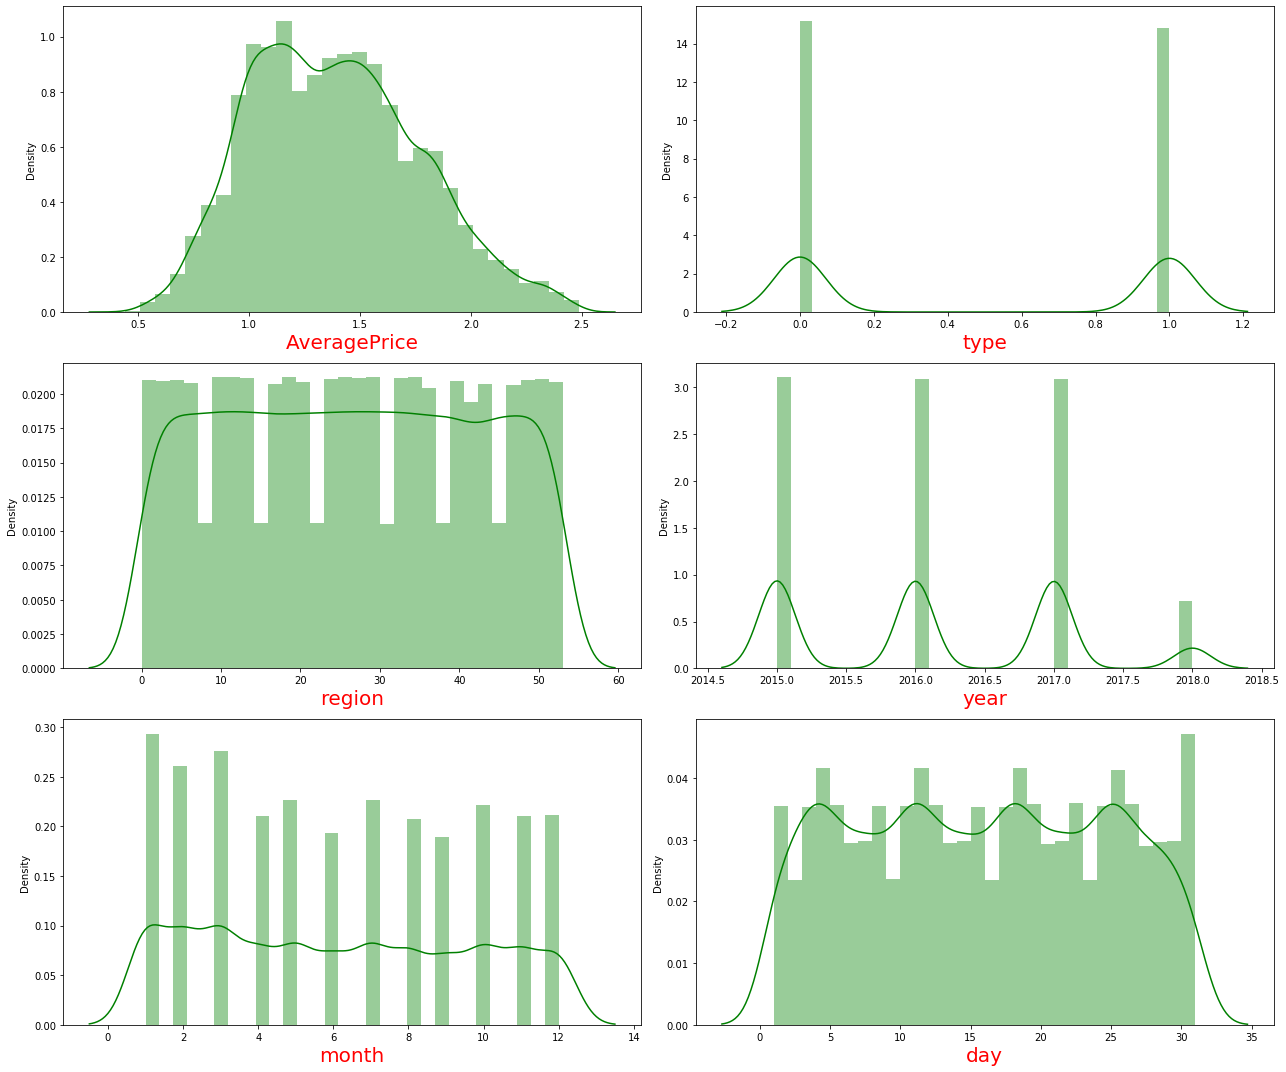

In [59]:
## plot a  distplot check the distribution

plt.figure(figsize=(18,15))
plotnumber = 1

for column in new_data:
    if plotnumber <= 6:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(new_data[column],bins=30,color='green')
        plt.xlabel(column,fontsize = 20,color='red')
    plotnumber+=1
plt.tight_layout()

### From distplot graph we can see that the skewness also a removed from the columns.

## Plotting Heatmap (Correlation matrix)

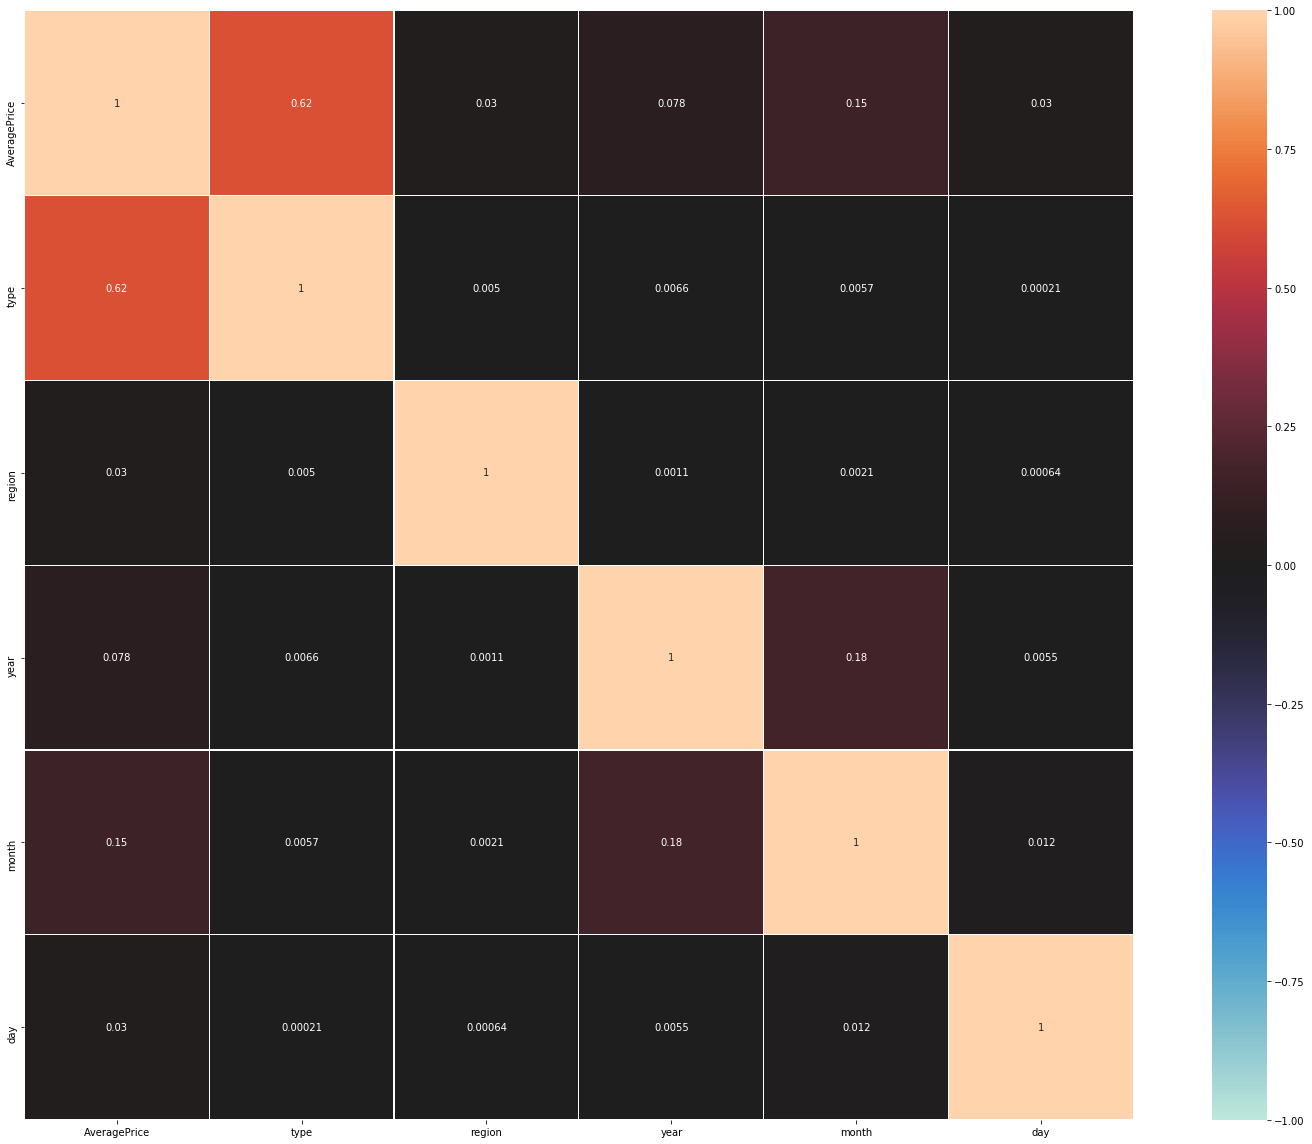

In [60]:
df_corr = new_data.corr().abs()

plt.figure(figsize=(22,16))
sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True,
           square=True,center=0,fmt='.2g',linewidths=.2,)
plt.tight_layout()

### From the heatmap graph we can see there is hight correlation the __"Type"__ column and our target variable __"AveragePrice"__.

## Let's check the relationship between our feature columns and the target column by using __Scatterplot()__

In [61]:
## first let's seperate our dataset into features and label

X = new_data.drop('AveragePrice',axis=1)
y = new_data.AveragePrice

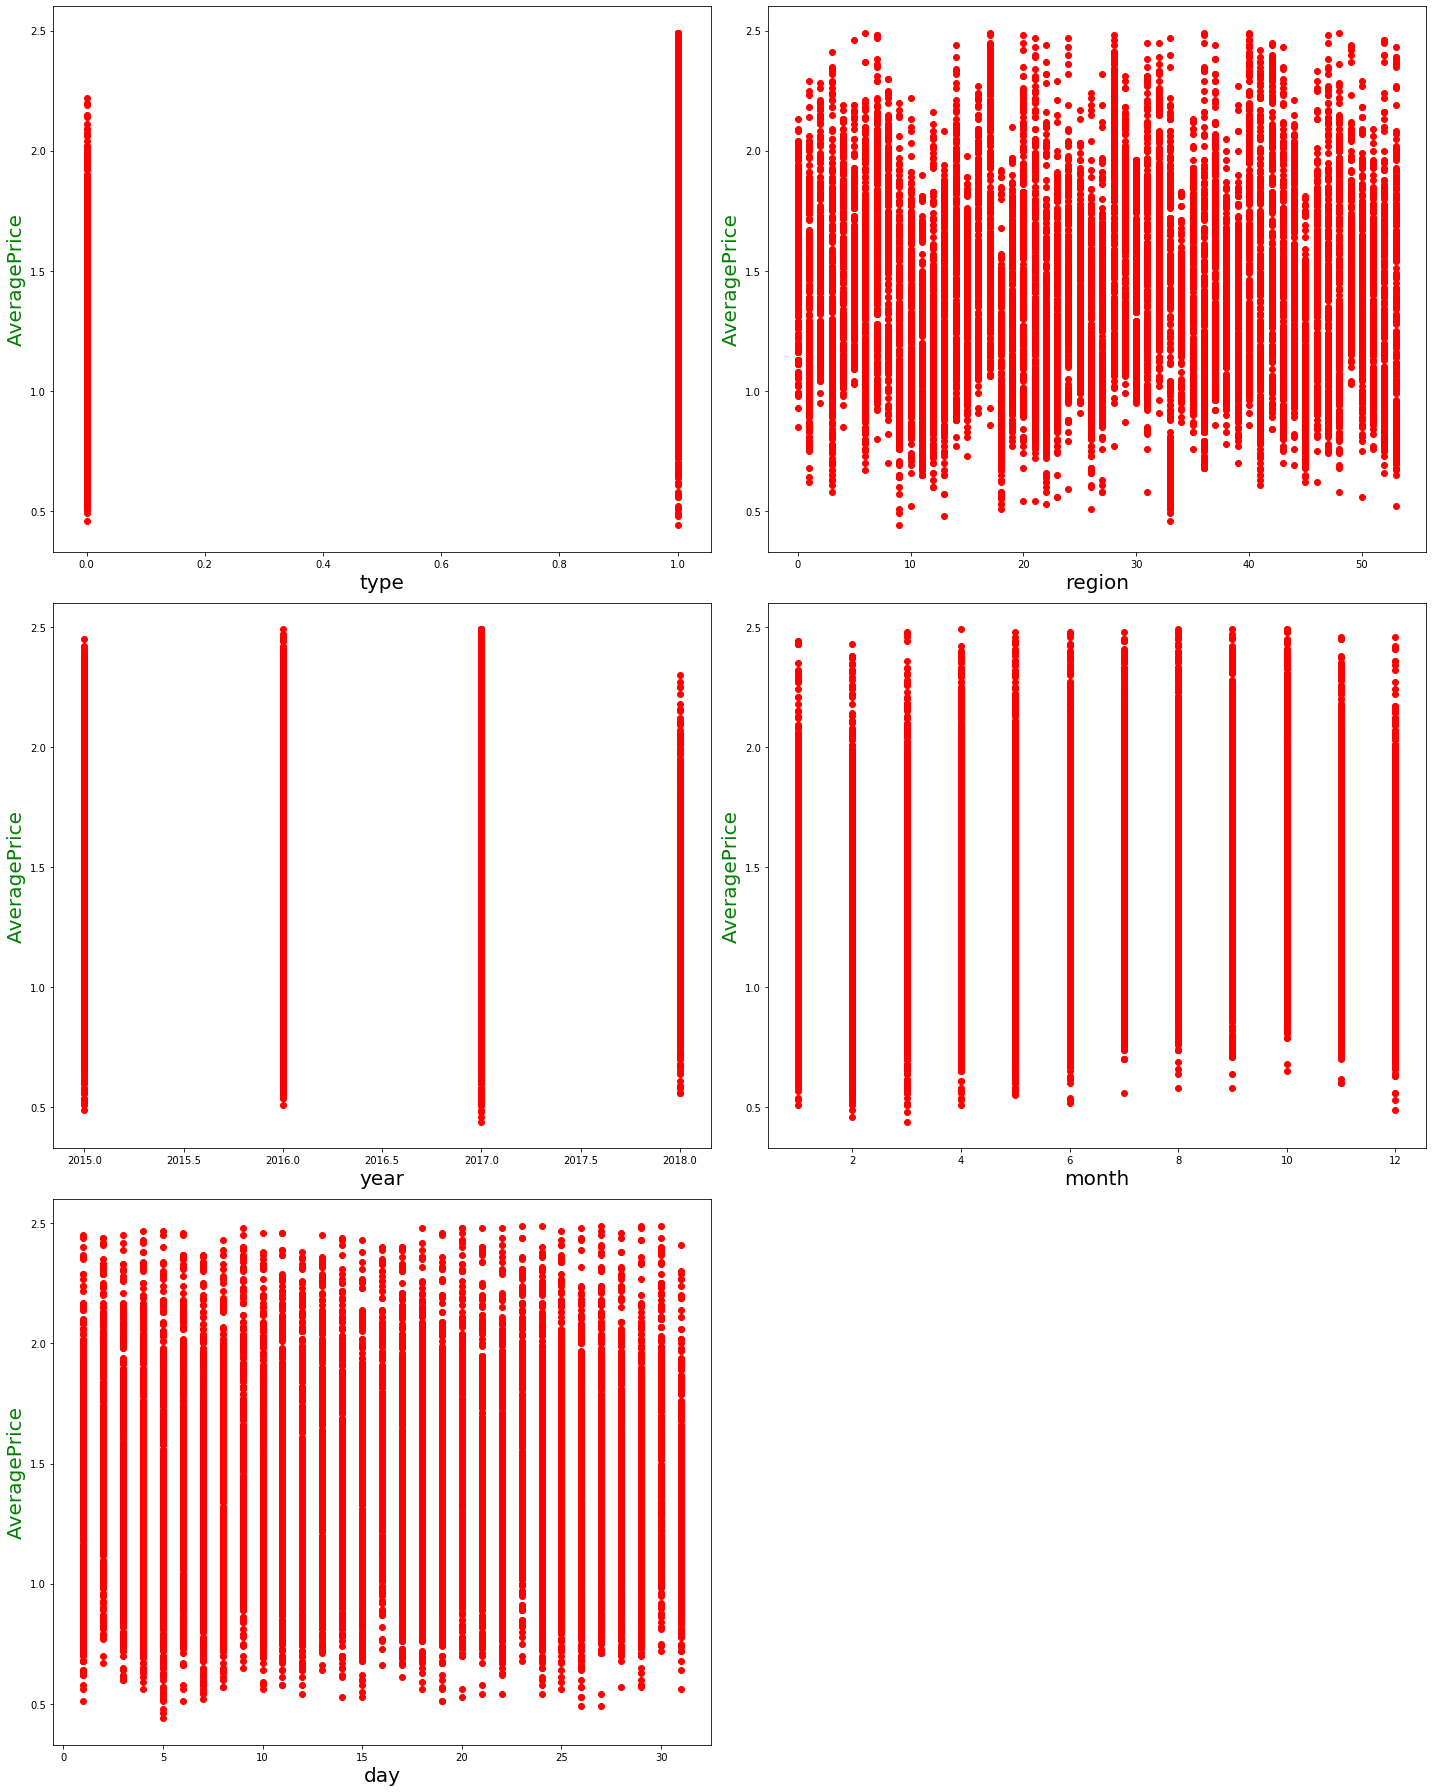

In [63]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber <= 6:
        ax = plt.subplot(3,2,plotnumber)
        plt.scatter(X[column],y, color ='red')
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('AveragePrice', fontsize = 20,color='green' )
        
    plotnumber+=1
plt.tight_layout()

### Great the relationship between the label and the features look fairly clear Linear.
### from the above scatter graph.Thus our __linearity assumption is satisfied__.

### **********************************************************************
## __Let's build the first model using Linear Regression Algorithum and check the accury socre.__

In [64]:
## importing the libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score, mean_squared_error


In [138]:
## Standarization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [139]:
X_scaled


array([[-0.98831658, -1.69689533, -1.21280856,  1.65094539,  1.29220268],
       [-0.98831658, -1.69689533, -1.21280856,  1.65094539,  0.49422451],
       [-0.98831658, -1.69689533, -1.21280856,  1.65094539, -0.30375366],
       ...,
       [ 1.01182153,  1.70672044,  1.97377263, -1.45746104,  0.60822139],
       [ 1.01182153,  1.70672044,  1.97377263, -1.45746104, -0.18975678],
       [ 1.01182153,  1.70672044,  1.97377263, -1.45746104, -0.98773495]])

In [140]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.30, random_state=355)

In [141]:
## Model Instantiating and training
reg = LinearRegression()
reg.fit(x_train, y_train)


LinearRegression()

#### __Model Evaluation__

In [142]:
y_pred = reg.predict(x_test)

In [143]:
mae = mean_absolute_error(y_test,y_pred)
print(mae)

0.2290113366283336


### we can see that means absolute Error is very less, that is a good result.

In [144]:
## let's check the accuracy using r2_score
print('\n*****Accuracy ****\n')

print(metrics.r2_score(y_test,y_pred))


*****Accuracy ****

0.40675479792797564


In [145]:
reg.score(x_test, y_test)

0.40675479792797564

### We can see that the scores and Accuracy are too low so let's build more model see if we can get better accuracy.

In [158]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LassoCV

In [160]:
### instantiate the models
dt = DecisionTreeRegressor()
ada = AdaBoostRegressor()
rid = Ridge()
las = Lasso()

In [161]:
dt.fit(x_train,y_train)
ada.fit(x_train,y_train)
rid.fit(x_train,y_train)
las.fit(x_train,y_train)
print('Models are accessfully fitted.!!!')

Models are accessfully fitted.!!!


In [162]:
dt_ypred = dt.predict(x_test)
ada_ypred = ada.predict(x_test)
rid_ypred = rid.predict(x_test)
las_ypred = las.predict(x_test)
print('Models are accessfully predicted.!!!')

Models are accessfully predicted.!!!


### __Models Evaluation__

In [163]:
## Models evaluation using Mean Absolute Erro

dt_mae  = mean_absolute_error(y_test,dt_ypred)
ada_mae = mean_absolute_error(y_test,ada_ypred)
rid_mae = mean_absolute_error(y_test,rid_ypred)
las_mae = mean_absolute_error(y_test,las_ypred)
print('\n','-'*50)
print('\nThe Mean Absolute Erro of DecisionTreeRegressor model is:',dt_mae )
print('\nThe Mean Absolute Erro of AdaBoostRegressor model is:',ada_mae)
print('\nThe Mean Absolute Erro of Ridge model is:',rid_mae)
print('\nThe Mean Absolute Erro of Lasso model is:',las_mae)


 --------------------------------------------------

The Mean Absolute Erro of DecisionTreeRegressor model is: 0.13432002956393202

The Mean Absolute Erro of AdaBoostRegressor model is: 0.21368757216019718

The Mean Absolute Erro of Ridge model is: 0.22901112451665456

The Mean Absolute Erro of Lasso model is: 0.31207486396213346


### Here we can say that __DecisionTreeRegressor__ model has the smallest __Mean Absolute Erro__.

In [164]:
print('\n','-'*50)
## Models evaluation using Mean Square Error (MSE)
print('\nThe Mean Square Erro of DecisionTreeRegressor model is:',mean_squared_error(y_test,dt_ypred))
print('\nThe Mean Square Erro of AdaBoostRegressor model is:',mean_squared_error(y_test,ada_ypred))
print('\nThe Mean Square Erro of Ridge model is:',mean_squared_error(y_test,rid_ypred))
print('\nThe Mean Square Erro of Lasso model is:',mean_squared_error(y_test,las_ypred))


 --------------------------------------------------

The Mean Square Erro of DecisionTreeRegressor model is: 0.038941648189209165

The Mean Square Erro of AdaBoostRegressor model is: 0.0748599453284471

The Mean Square Erro of Ridge model is: 0.08525695821850758

The Mean Square Erro of Lasso model is: 0.1437135912642671


### Here we can say that __DecisionTreeRegressor__ model has the smallest __Mean Square Erro .__

In [165]:
## Models accuracy score 

print('\n*****Accuracy DecisionTreeRegressor model ****\n')
print(metrics.r2_score(y_test,dt_ypred))
print('\n','-'*50)
print('\n*****Accuracy of  AdaBoostRegressor model ****\n')
print(metrics.r2_score(y_test,ada_ypred))
print('\n','-'*50 )
print('\n*****Accuracyof Ridge model ****\n')
print(metrics.r2_score(y_test,rid_ypred))
print('\n','-'*50)    
print('\n*****Accuracy of Lasso model****\n')
print(metrics.r2_score(y_test,las_ypred))
print('\n','-'*50)


*****Accuracy DecisionTreeRegressor model ****

0.7290323673159538

 --------------------------------------------------

*****Accuracy of  AdaBoostRegressor model ****

0.47910211529959446

 --------------------------------------------------

*****Accuracyof Ridge model ****

0.406756590628508

 --------------------------------------------------

*****Accuracy of Lasso model****

-2.1421844167424098e-06

 --------------------------------------------------


### We can see here that __DecisionTreeRegressor__ model have the highest __Accuracy 72%__ among these 4 models and also has the smallest __MAE(Mean Absolute Error)__



Text(0.5, 1.0, 'Actual VS Predicted')

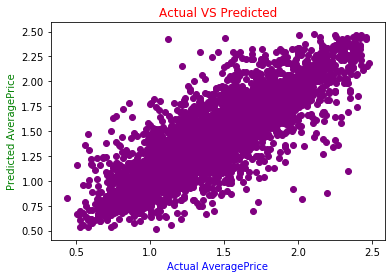

In [166]:
## let's plot it and see visually
plt.scatter(y_test,dt_ypred,color ='purple')
plt.xlabel('Actual AveragePrice',color='blue')
plt.ylabel('Predicted AveragePrice',color='green')
plt.title('Actual VS Predicted',color='r')

### We can see that __DecisionTreeRegressor model__ gives a great __linear relationship__ with our dataset.

### Let's build again one more  model. using RandomForestRegessor Algorithum.

In [171]:
## importing the libraries
from sklearn.ensemble import RandomForestRegressor

In [242]:
## Instantiate RandomForestRegressor

rfr = RandomForestRegressor( random_state=62)

In [243]:
rfr_model = rfr.fit(x_train, y_train)

In [244]:
## let's do the prediction
y_pred_r = rfr_model.predict(x_test)

### model evalution

In [245]:
## checking the  mean_absolute_error

rfr_mae  = mean_absolute_error(y_test,y_pred_r)
print(rfr_mae)

0.11031112342941608


In [246]:
print('\nThe Mean Square Erro of RandomForestRegressor model is:',mean_squared_error(y_test,y_pred_r))


The Mean Square Erro of RandomForestRegressor model is: 0.02424304219142646


In [247]:
print('\n*****Accuracy RandomForestRegressor model ****\n')
print(metrics.r2_score(y_test,y_pred_r))
print('\n','-'*50)


*****Accuracy RandomForestRegressor model ****

0.8313096631207667

 --------------------------------------------------


## we can see that the Accuracy RandomForestRegressor  model 83% and have the

## smallest MAE(Mean Absolute Error)  = 0.13 and  smallest Mean Square Erro =  0.024

## __So we can select RandomForestRegressor like our best model.__

### Let's go for  Hyper Paramter Turning (HPT)..

In [227]:
## Number of estimator
n_estimators = [int(x) for x in np.linspace(start=5,stop=100,num=20)]
max_depth =[2,4,6]
min_samples_split = [2,5]
min_samples_leaf = [1,2]
bootstrap =[True,False]

In [233]:
## Creating param grid

param_grid = {'n_estimators':n_estimators,
             'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'bootstrap':bootstrap             
}
print(param_grid)

{'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100], 'max_depth': [2, 4, 6], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [234]:
rf_model_post = RandomForestRegressor()

In [235]:
from sklearn.model_selection import GridSearchCV

In [236]:
rfGrid = GridSearchCV(estimator = rf_model_post,
                      param_grid=param_grid,cv=5,
                     verbose=2,n_jobs=-1)

In [237]:
rfGrid.fit(x_train,y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4, 6],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50,
                                          55, 60, 65, 70, 75, 80, 85, 90, 95,
                                          100]},
             verbose=2)

In [238]:
rfGrid.best_params_

{'bootstrap': True,
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 95}

In [239]:
## We can see the best parameters 

y_rf_pred = rfGrid.predict(x_test)

In [240]:
print('\n*****Accuracy RandomForestRegressor model ****\n')
print(metrics.r2_score(y_test,y_rf_pred))
print('\n','-'*50)


*****Accuracy RandomForestRegressor model ****

0.5643904846144455

 --------------------------------------------------


## After Hyper Paramter Turning (HPT) we not able to get better accuracy.

### let's plot again our selected model and see the relationship with data..

Text(0.5, 1.0, 'Actual VS Predicted')

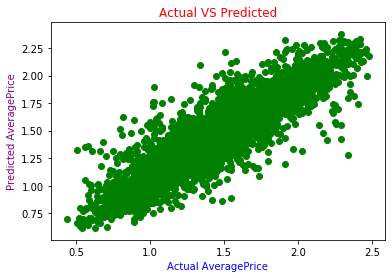

In [250]:
## let's plot it and see visually
plt.scatter(y_test,y_pred_r,color ='green')
plt.xlabel('Actual AveragePrice',color='blue')
plt.ylabel('Predicted AveragePrice',color='purple')
plt.title('Actual VS Predicted',color='r')

## Our Best model is RandomForestRegressor model with __accuracy of 83% and MSE = 0.024__

### ************************************

## let's predict the first record of our data and see how our model perform.

In [251]:
prediction = rfr_model.predict([[0,0,2015,12,27]])

In [253]:
print("The actual values is :",1.33,"and predicted values is:",prediction)

The actual values is : 1.33 and predicted values is: [0.8937]


## Let's save our best model __rfr_model__ selected.

In [254]:
import joblib
joblib.dump(rfr_model,'Avocado_AvgPrice_prediction_Model.pkl')

['Avocado_AvgPrice_prediction_Model.pkl']